In [40]:
from fastai.vision import *
from fastai.vision import Image
from fastai.widgets import *
import torch
import os, os.path
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

%matplotlib inline

## The trained model is on 'face_data' folder. Details on TWICE_Face_Recognition.ipynb
## This code is just for production

In [9]:
defaults.device = torch.device('cpu')
path=Path('face_data')
learn = load_learner(path)

In [76]:
#function to detect faces  ##very similar to detect_face()
def detect_faces(img):
    #convert the test image to gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #load OpenCV face detector
    face_cas = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cas.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=4);
    #if no faces are detected then return image
    if (len(faces) == 0):
        return None, None
    #extract the face
    
    rect=[]
    face=[]
    
    
    for (x, y, w, h) in faces:
        rect.append((x, y, w, h))
        
        ###change from BGR from opencv to PIL RGB
        face_rgb = cv2.cvtColor(img[y: y+w, x: x+h], cv2.COLOR_BGR2RGB)
        ###change from PIL RGB to fastai tensor
        face.append(vision.Image(pil2tensor(face_rgb, np.float32).div_(255)))
        
    #return only the face part
    return face, rect


#function to draw rectangle on image
#according to given (x, y) coordinates and
#given width and heigh
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
#function to draw text on give image starting from
#passed (x, y) coordinates.
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)
    
#this function recognizes the person in image passed
#and draws a rectangle around detected face with name of the subject
def predict(test_img):
#make a copy of the image as we don't want to chang original image
    img = test_img.copy()
    

#detect face from the image
    faces, rects = detect_faces(img)
    
## it's possible that there's no target object on certain frames
    if faces is None:
        return img
    
    ##there could be multiple people in one img
    for i in range(len(faces)):
        pred_class, pred_idx, outputs = learn.predict(faces[i])
        if outputs[int(pred_idx)]<0.4:
            label_text='unknown person'
        else:
            label_text= str(pred_class)
    #draw a rectangle around face detected
        draw_rectangle(img, rects[i])
    #draw name of predicted person
        draw_text(img, label_text, rects[i][0], rects[i][1]-5)
    return img

In [45]:
# a = cv2.imread('test.png')
# a= cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
# plt.imshow(a)
# plt.show()
# vision.Image(pil2tensor(a, np.float32).div_(255))


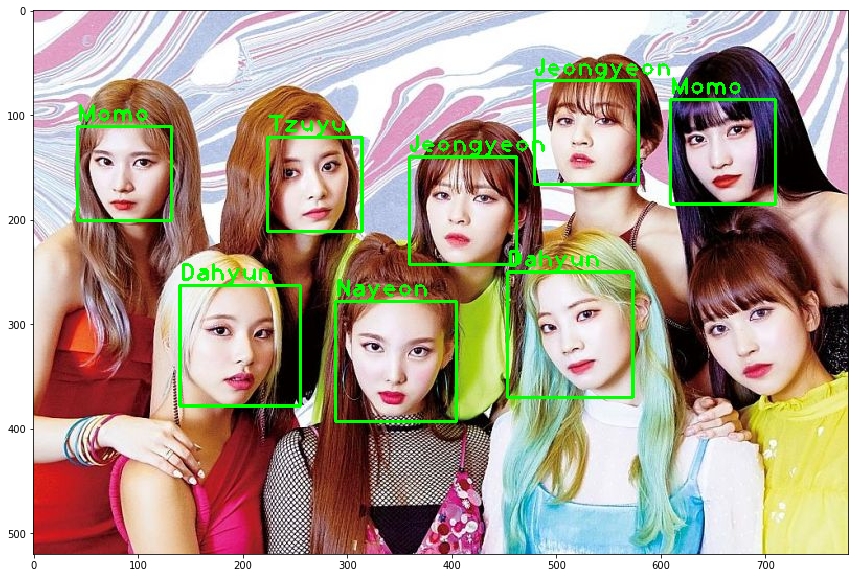

In [77]:
prediction=predict(cv2.imread('group_test_1.jpg'))
prediction_RGB= cv2.cvtColor(prediction, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(prediction_RGB)
plt.show()

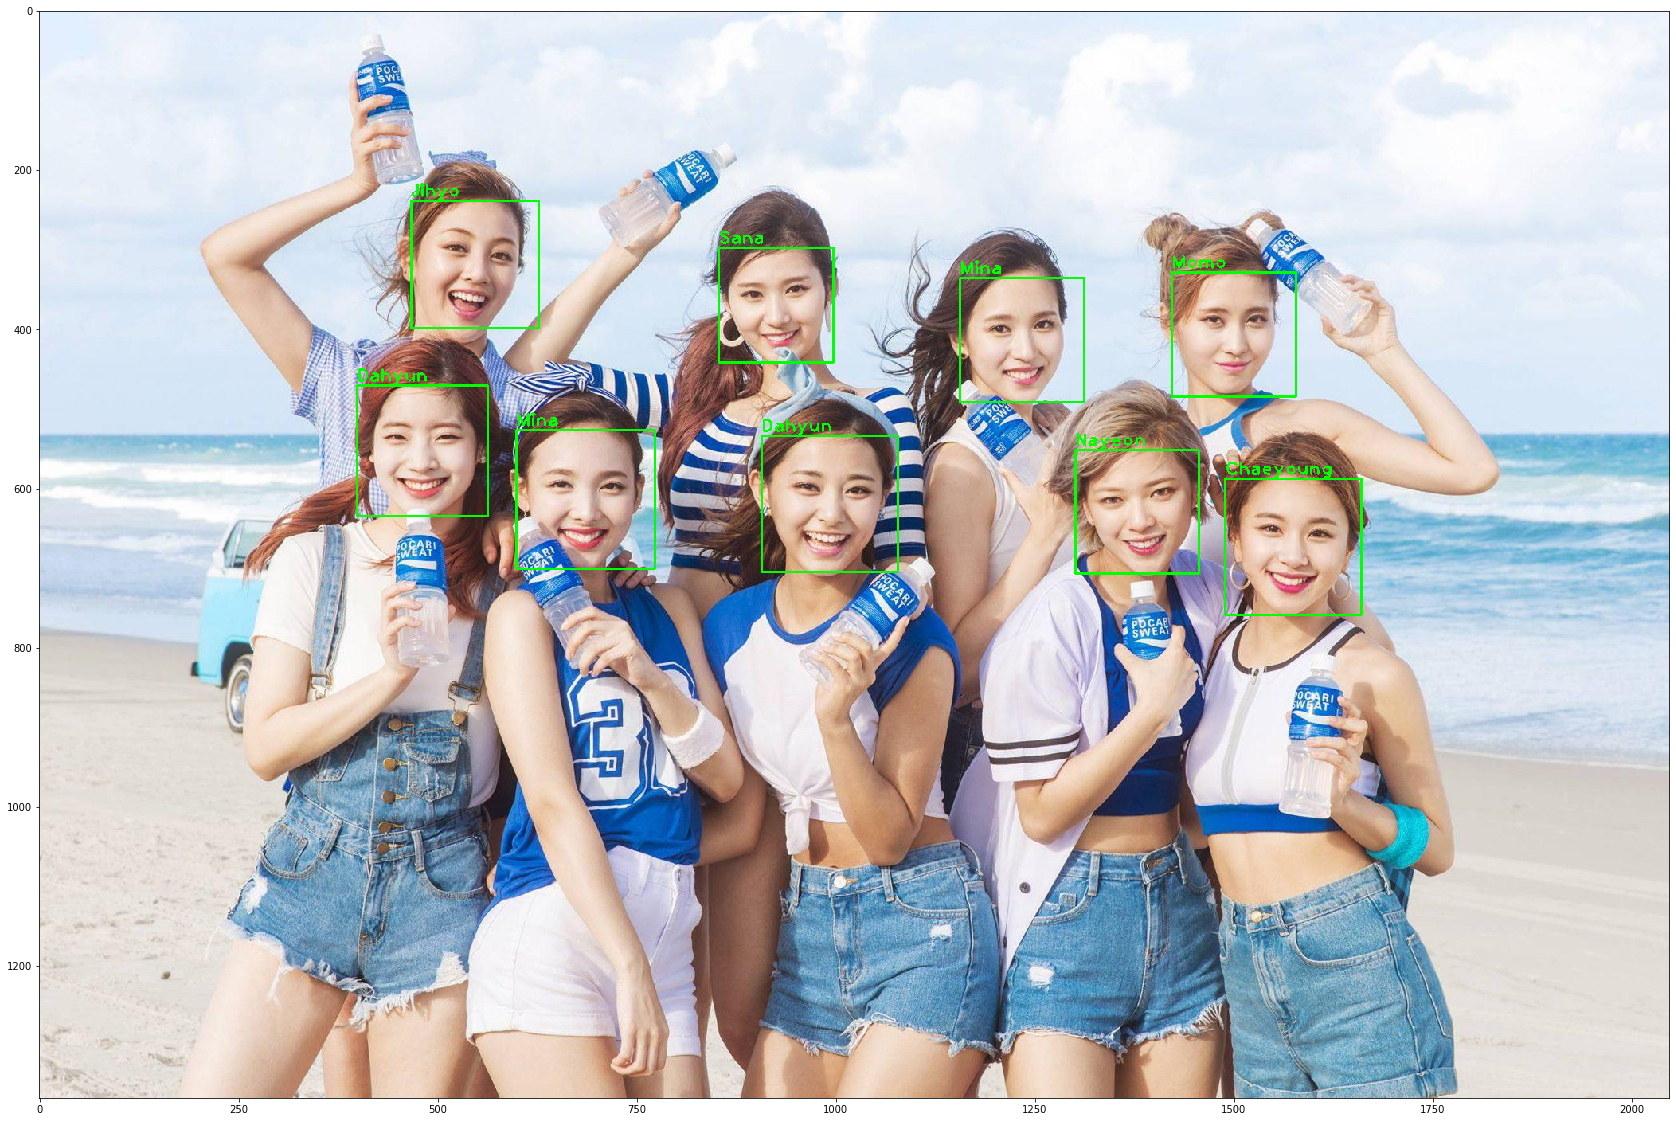

In [78]:
prediction=predict(cv2.imread('group_test_2.jpg'))
prediction_RGB= cv2.cvtColor(prediction, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(30,20))
plt.imshow(prediction_RGB)
plt.show()

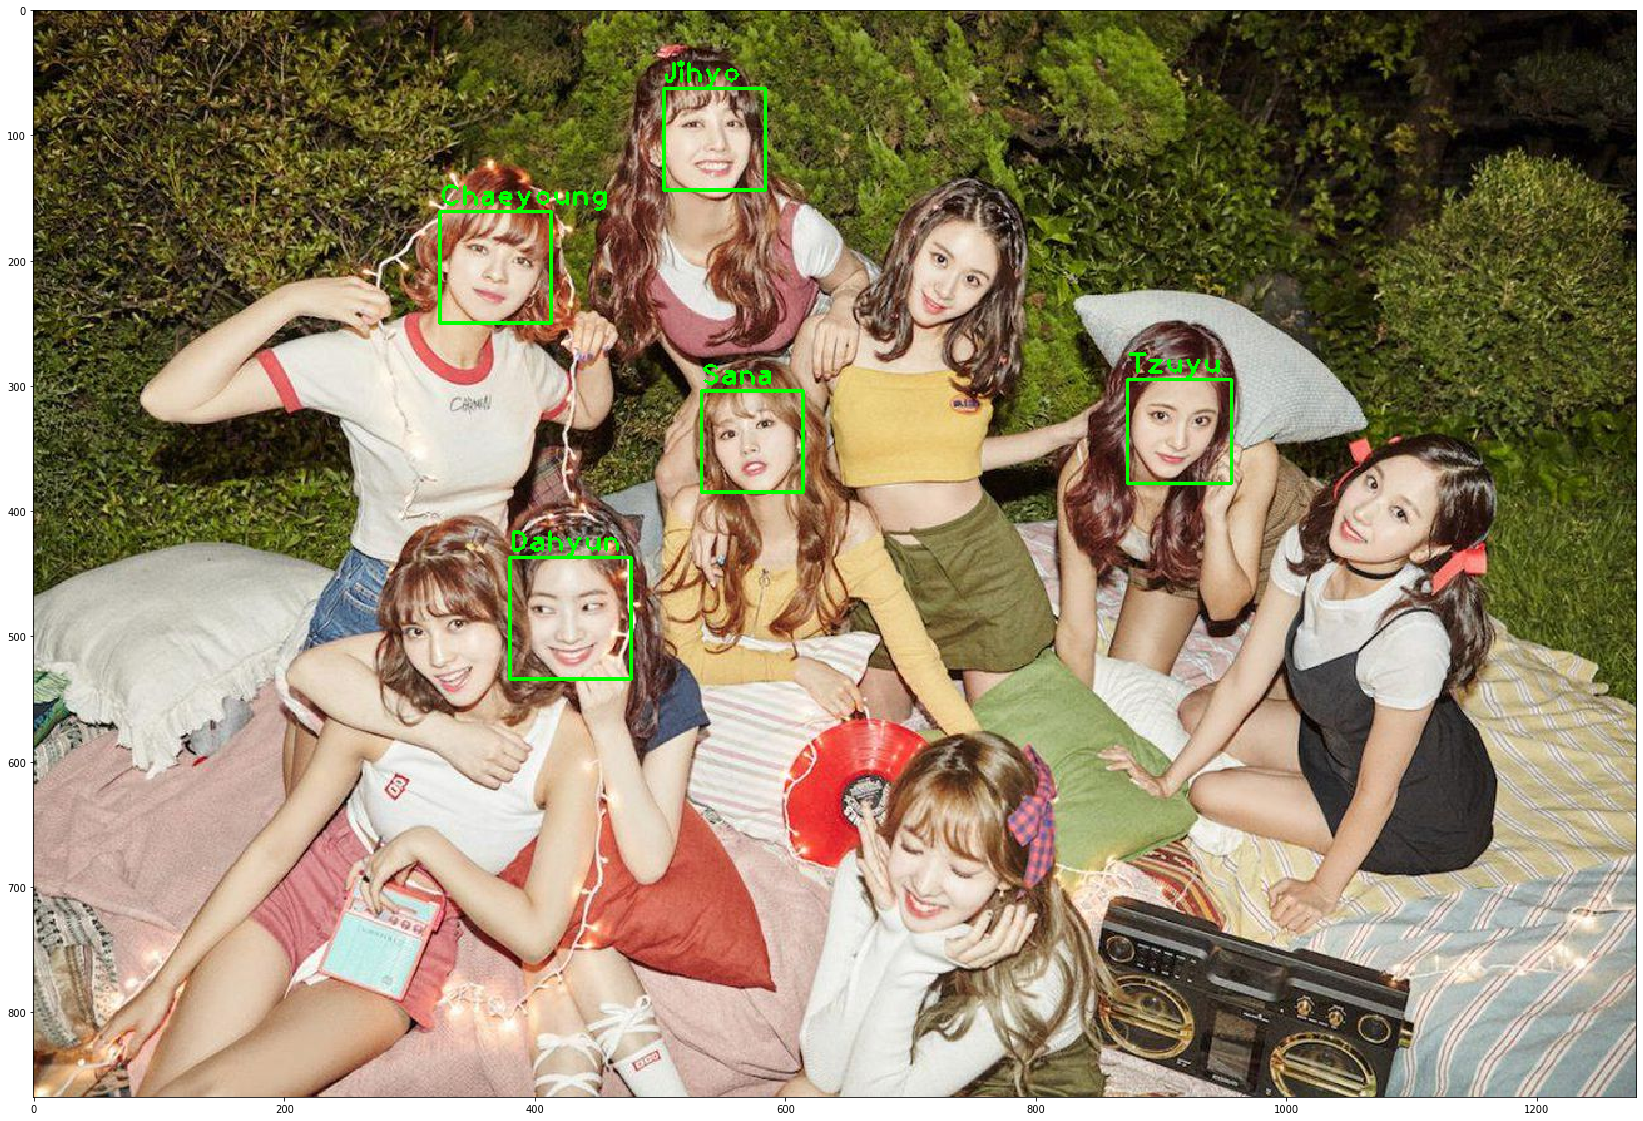

In [79]:
prediction=predict(cv2.imread('group_test_3.jpg'))
prediction_RGB= cv2.cvtColor(prediction, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(30,20))
plt.imshow(prediction_RGB)
plt.show()